In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
DATASET='50'

In [3]:
seq = get_standardized_measures(f'results/sequential_{DATASET}.csv')
seq_time_tot = seq['TOTAL'].mean()

In [4]:
seq_time_tot

9975099880.0

In [5]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [6]:
thr

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,11245933,269928623,95032,2622653784,6805000169,46736937,9755660478
1,2,11326289,137943617,85694,1404513061,3456498419,42389517,5052756597
2,3,11609666,92341030,91114,991269970,2363440688,47872533,3506625001
3,4,10933240,72278498,90896,812640664,1812788917,45506480,2754238695
4,5,12226516,58892406,85567,639583302,1464366284,44829748,2219983823
5,6,11521741,48799978,92522,553020063,1224661874,46384045,1884480223
6,7,10971372,41920236,91344,481901246,1050171848,44559025,1629615071
7,8,12681421,38071795,91524,472972518,920544174,44417920,1488779352
8,9,13910642,35402191,94385,440332133,821974187,44347582,1356061120
9,10,12723582,41593438,129154,404464289,742111811,18141726,1219164000


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

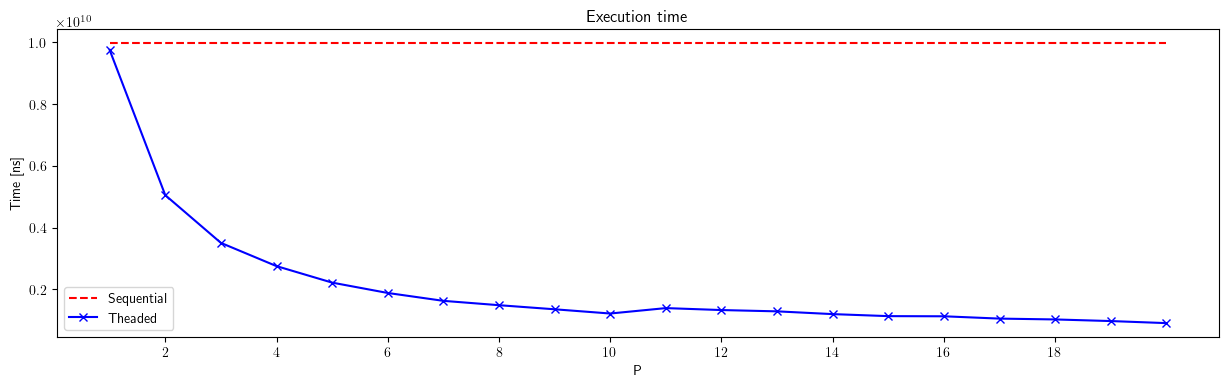

In [8]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(thr['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
# sequential
plt.plot(thr['P_DEGREE'], [seq_time_tot for _ in range(len(thr['P_DEGREE']))], '--r')
# parallel
plt.plot(thr['P_DEGREE'], thr['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [9]:
import pandas as pd

In [10]:
# compute the mean for each group
sp_data = thr.groupby('P_DEGREE', as_index=False).median()

In [11]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,11245933.0,269928623.0,95032.0,2.622654e+09,6.805000e+09,46736937.0,9.755660e+09
1,2,11326289.0,137943617.0,85694.0,1.404513e+09,3.456498e+09,42389517.0,5.052757e+09
2,3,11609666.0,92341030.0,91114.0,9.912700e+08,2.363441e+09,47872533.0,3.506625e+09
3,4,10933240.0,72278498.0,90896.0,8.126407e+08,1.812789e+09,45506480.0,2.754239e+09
4,5,12226516.0,58892406.0,85567.0,6.395833e+08,1.464366e+09,44829748.0,2.219984e+09
5,6,11521741.0,48799978.0,92522.0,5.530201e+08,1.224662e+09,46384045.0,1.884480e+09
6,7,10971372.0,41920236.0,91344.0,4.819012e+08,1.050172e+09,44559025.0,1.629615e+09
7,8,12681421.0,38071795.0,91524.0,4.729725e+08,9.205442e+08,44417920.0,1.488779e+09
8,9,13910642.0,35402191.0,94385.0,4.403321e+08,8.219742e+08,44347582.0,1.356061e+09
9,10,12723582.0,41593438.0,129154.0,4.044643e+08,7.421118e+08,18141726.0,1.219164e+09


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [12]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [13]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,S_p
0,1,11245933.0,269928623.0,95032.0,2.622654e+09,6.805000e+09,46736937.0,9.755660e+09,1.022494
1,2,11326289.0,137943617.0,85694.0,1.404513e+09,3.456498e+09,42389517.0,5.052757e+09,1.974190
2,3,11609666.0,92341030.0,91114.0,9.912700e+08,2.363441e+09,47872533.0,3.506625e+09,2.844644
3,4,10933240.0,72278498.0,90896.0,8.126407e+08,1.812789e+09,45506480.0,2.754239e+09,3.621727
4,5,12226516.0,58892406.0,85567.0,6.395833e+08,1.464366e+09,44829748.0,2.219984e+09,4.493321
5,6,11521741.0,48799978.0,92522.0,5.530201e+08,1.224662e+09,46384045.0,1.884480e+09,5.293290
6,7,10971372.0,41920236.0,91344.0,4.819012e+08,1.050172e+09,44559025.0,1.629615e+09,6.121139
7,8,12681421.0,38071795.0,91524.0,4.729725e+08,9.205442e+08,44417920.0,1.488779e+09,6.700187
8,9,13910642.0,35402191.0,94385.0,4.403321e+08,8.219742e+08,44347582.0,1.356061e+09,7.355937
9,10,12723582.0,41593438.0,129154.0,4.044643e+08,7.421118e+08,18141726.0,1.219164e+09,8.181918


In [14]:
max_speedup = sp_data[sp_data['S_p'].max() == sp_data['S_p']]

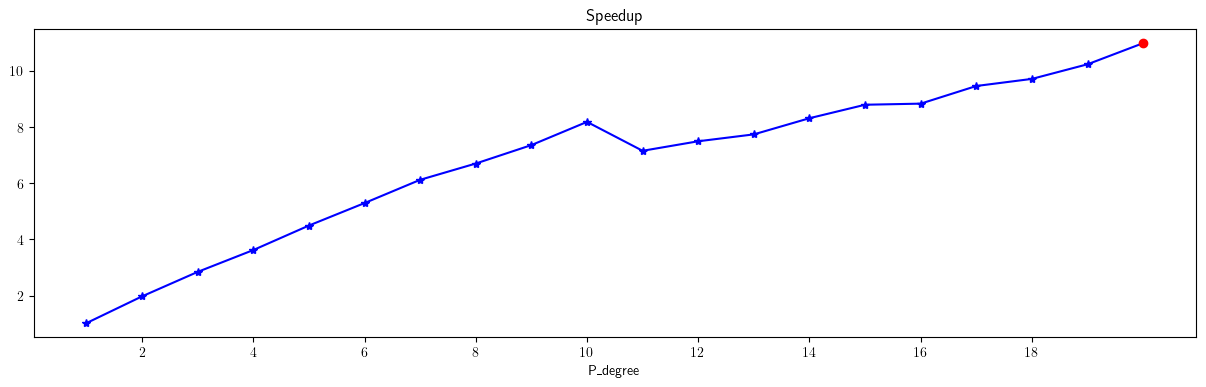

In [15]:
# plot results
plt.figure(figsize=(15,4))
plt.title("Speedup")
plt.xlabel('P_{degree}')
plt.xticks(range(0, len(sp_data), 2))
plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], '*-b')
plt.plot(max_speedup['P_DEGREE'],max_speedup['S_p'], 'or')

### Max Speedup

Max speedup reached

In [16]:
max_speedup

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,S_p
19,20,10848287.0,26559755.0,93389.0,307599719.0,544321726.0,18717263.0,908140139.0,10.984098


# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [17]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    9.755660e+09
Name: TOTAL, dtype: float64

In [18]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


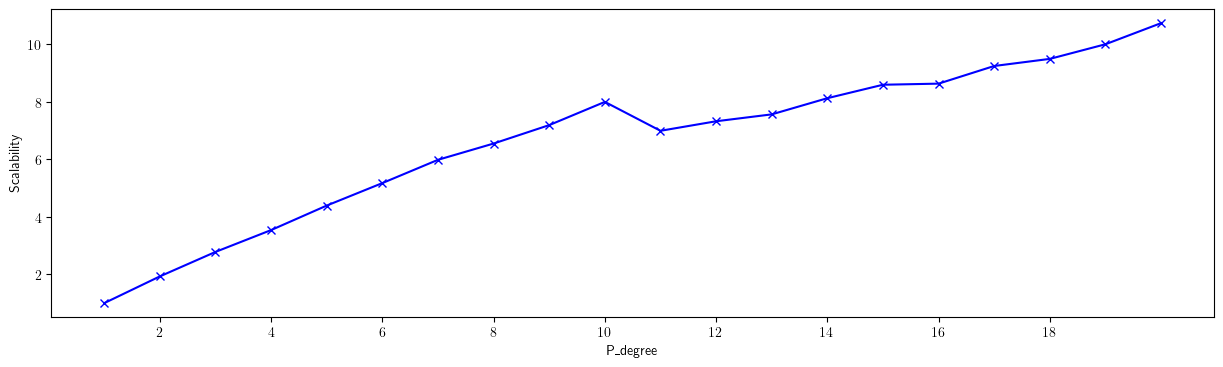

In [19]:
# plot results
plt.figure(figsize=(15,4))
plt.xticks(range(0, len(sp_data), 2))
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')

In [20]:
seq_time_tot/190740907

52.29659456322078